**Table of Content:**
* [Get Data](#1)
* [Exploratory Data Analysis (EDA)](#2)
* [Correlation Between Variables](#3)
* [Data Preparation](#4)
* [Baseline Models](#5)
* [Error Analysis](#6)
* [Feature Engineering](#7)
* [Learning Curve](#8)
* [Hyperparameter Tuning](#9)
* [Test Models on Real Data](#10)
* [Observations](#11)

<a id="1"></a>
## Get Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
iris = pd.read_csv('./Iris.csv')

iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [2]:
# Structure of the dataset
# If there aren`t null values, data can be processed
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
# Drop 'Id' column
iris.drop('Id', axis=1, inplace=True)
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
# Summary of the numerical attributes
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<a id="2"></a>
## Exploratory Data Analysis

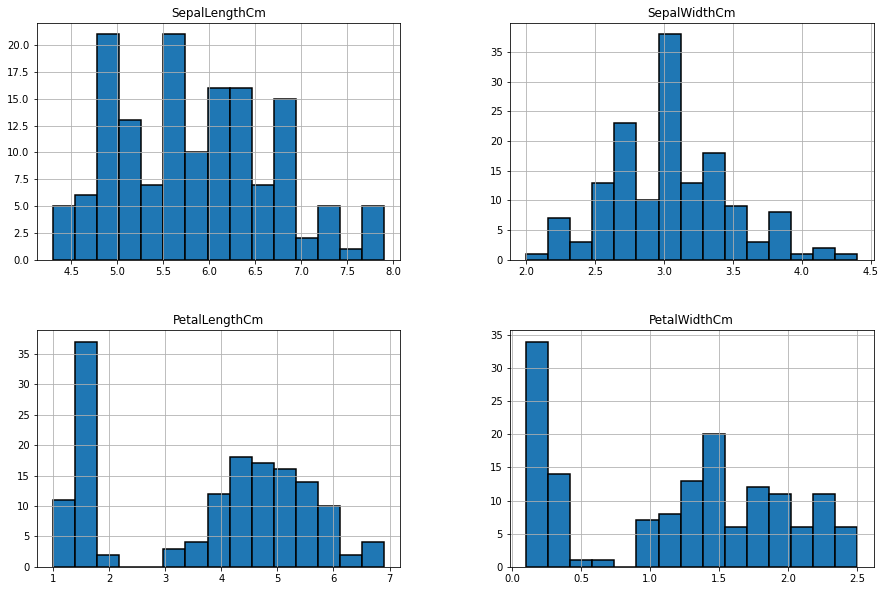

In [5]:
# Histogram of the attributes in dataset
iris.hist(bins=15, edgecolor='black', linewidth=1.5, figsize=(15,10))
plt.show()

As we can see in the histograms, the features “*PetalLengthCm*” and “*PetalWidthCm*” have a gap that separates low values. Maybe one of the species has different sizes of Petals. Let’s check this on boxplot.

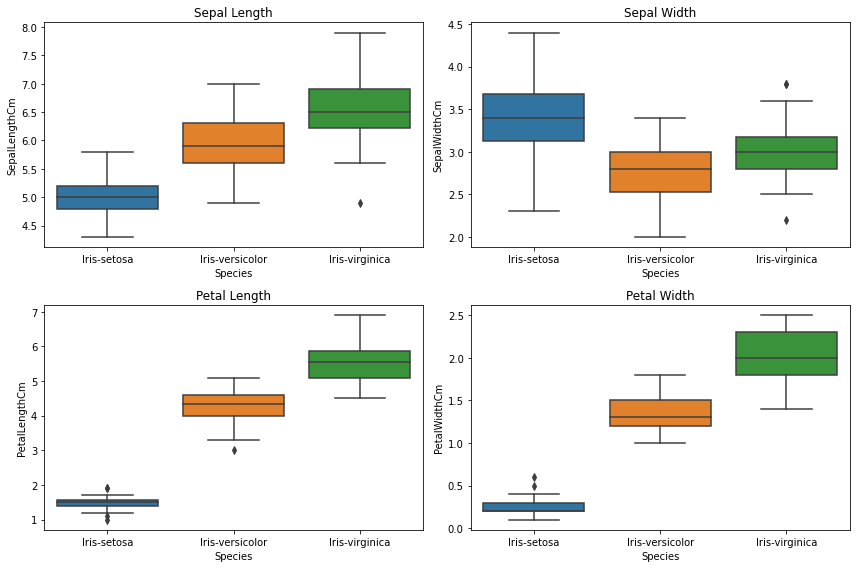

In [6]:
# Distribution of the dataset according to the species
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.title("Sepal Length")
sns.boxplot(y="SepalLengthCm", x="Species", data=iris)
plt.subplot(2,2,2)
plt.title("Sepal Width")
sns.boxplot(y="SepalWidthCm", x="Species", data=iris)
plt.subplot(2,2,3)
plt.title("Petal Length")
sns.boxplot(y="PetalLengthCm", x="Species", data=iris)
plt.subplot(2,2,4)
plt.title("Petal Width")
sns.boxplot(y="PetalWidthCm", x="Species", data=iris)
plt.tight_layout()
plt.show()

Our assumption is confirmed by the bottom row of the boxplots, which shows that one of the three species has different Sepal values. We can guess that “*Iris-setosa*” should be easiest to classify.

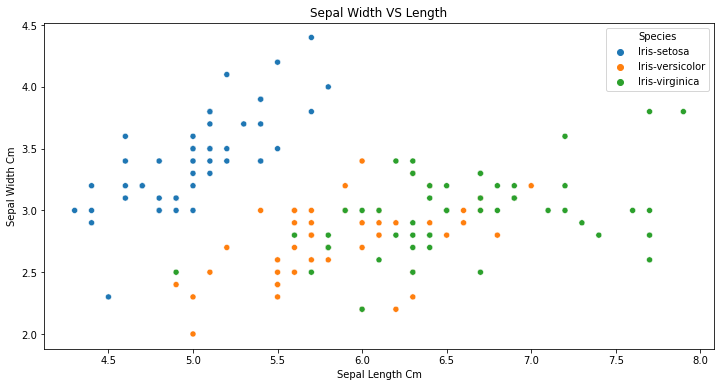

In [7]:
# Relationship between the sepal width and length
plt.figure(figsize=(12,6))
plt.title("Sepal Width VS Length")
sns.scatterplot(x=iris["SepalLengthCm"], y=iris["SepalWidthCm"], hue=iris["Species"])
plt.xlabel("Sepal Length Cm")
plt.ylabel("Sepal Width Cm")
plt.show()

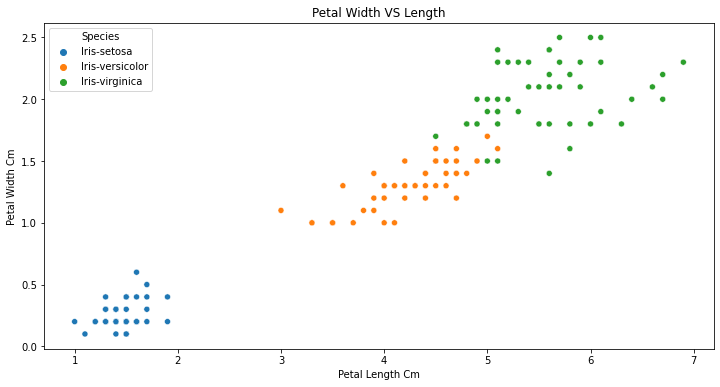

In [8]:
# Relationship between the petal width and length
plt.figure(figsize=(12,6))
plt.title("Petal Width VS Length")
sns.scatterplot(x=iris["PetalLengthCm"], y=iris["PetalWidthCm"], hue=iris["Species"])
plt.xlabel("Petal Length Cm")
plt.ylabel("Petal Width Cm")
plt.show()

It seems that the Petal features give a better cluster division compared to the Sepal features.

<a id="3"></a>
## Correlation Between Variables

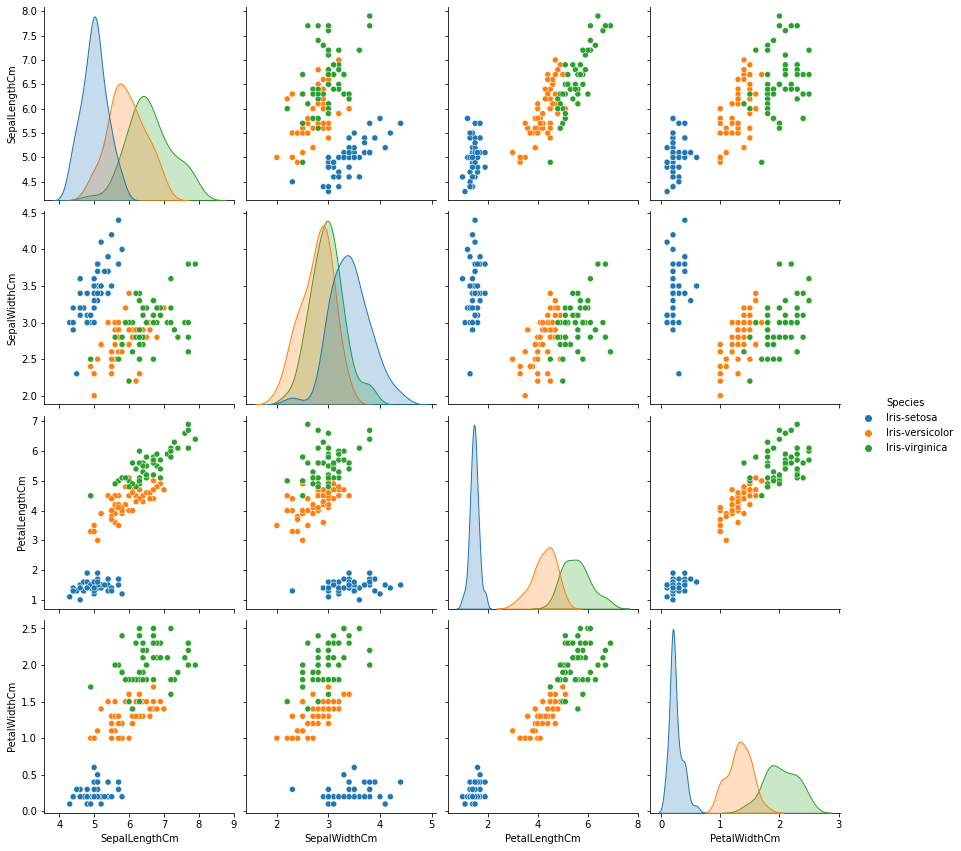

In [9]:
# Plots each numerical attribute against evry other numerical attribute
sns.pairplot(iris, hue="Species", height=3)
plt.show()

Almost on each other plot, we can see a high correlation. Especially in the species “*Iris-setosa*”.

In [10]:
# Correlation between features
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Correlation between features gives us the association between features in the dataset (endogenous variables) and feature what we want to predict (exogenous variable). The strength of association decided which feature is most usefull to predict exogenous variable. On the other hand, highly correlatred endogenous variables can provide to multicollinearity between features. This can casue reduce of accuracy.

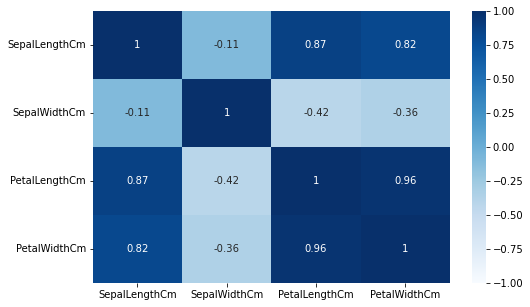

In [11]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(iris.corr(), cmap="Blues", vmin=-1, annot=True)
plt.show()

We can see three features which have high correlation: *Sepal Length*, *Petal Length* and *Petal Width*.
Comparing correlation matrix to the boxplots, gives the following **results**:

Primarily, three boxplots have the same pattern. Distribution of the “*Iris-setosa*” is in the low end, “*Iris-versicolor*” is in the middle and “*Iris-virginica*” is in the high end. This confirms high correlation between three features as we observed in correlation matrix.

Secondly, *“Iris-setosa”* is easy to distinguish in *Petal Length* and *Petal Width* values.

<a id="4"></a>
## Data Preparation

In [12]:
from sklearn.model_selection import train_test_split

# Spliting the iris dataset into it‘s attributes (X) and labels (y).
# drop() is making a copy of the data (if inplace = False)
X = iris.drop("Species", axis=1)
y = iris["Species"].copy()

# Spliting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test:  {X_test.shape}")

Shape of X_train: (120, 4)
Shape of X_test:  (30, 4)


In [13]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Converting string labels into numbers
# Encoding before splitting the data will lead to data leakage
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Standardisation for better processing data
# Pipeline() enable transform data in right sequence. E.g. SimpleImputer() before StandardScaler()
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

# ColumnTransformer() enable transform different type of columns 
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, X_train.columns)
])

X_train_prepared = full_pipeline.fit_transform(X_train)
# X_test_prepared = full_pipeline.transform(X_test) # We wait until the end to use the test set
print(X_train_prepared[0])

[-0.18341766 -0.54551376  0.17265991  0.11167252]


<a id="5"></a>
## Baseline Models
We will train a few different models with their default settings. After compare accuracy of these models, we can make a list of best models. 


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()

# Implementing estimator and evaluate a score by use cross-validation
# During fourfold training and evaluation, train data is divided in 4 folds, where one in each is used for validation
scores_log = cross_val_score(log_reg, X_train_prepared, y_train, cv=4, scoring="accuracy")

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores_log)

Scores: [1.         0.86666667 0.96666667 0.96666667]
Mean: 0.9500000000000001
Standard deviation: 0.04999999999999999


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

scores_knn = cross_val_score(knn_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_knn)

Scores: [1.         0.93333333 0.96666667 0.93333333]
Mean: 0.9583333333333333
Standard deviation: 0.02763853991962833


In [16]:
from sklearn.svm import SVC

svm_clf = SVC()

scores_svm = cross_val_score(svm_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_svm)

Scores: [1.         0.93333333 0.96666667 0.93333333]
Mean: 0.9583333333333333
Standard deviation: 0.02763853991962833


In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

scores_tree = cross_val_score(tree_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_tree)

Scores: [1.         0.86666667 0.96666667 0.96666667]
Mean: 0.9500000000000001
Standard deviation: 0.04999999999999999


In [18]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

scores_forest = cross_val_score(forest_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_forest)

Scores: [1.         0.86666667 0.96666667 0.93333333]
Mean: 0.9416666666666667
Standard deviation: 0.04930066485916346


In my process SVC has the highest accuracy. Behind them are Logistic Regression, KNN and Decision Tree. It is possible that you have different score and another algorithm is the best. Despite that, we need to analyse errors of our algorithms to make better performance.

<a id="6"></a>
## Error Analysis
We will use confusion matrix to analyse the errors of our models. 

In [19]:
from sklearn.model_selection import cross_val_predict

# Making a predictions to compare them with actual targets
pred_log = cross_val_predict(log_reg, X_train_prepared, y_train, cv=4)
pred_knn = cross_val_predict(knn_clf, X_train_prepared, y_train, cv=4)
pred_svm = cross_val_predict(svm_clf, X_train_prepared, y_train, cv=4)
pred_tree = cross_val_predict(tree_clf, X_train_prepared, y_train, cv=4)
pred_forest = cross_val_predict(tree_clf, X_train_prepared, y_train, cv=4)

print(pred_log[:5])

[1 1 1 2 0]


In [20]:
# Let's recall what these numbers mean
labels = le.classes_
en_labels = le.transform(le.classes_)
for i, j in zip(labels, en_labels):
    print(i,":", j)

Iris-setosa : 0
Iris-versicolor : 1
Iris-virginica : 2


In [21]:
from sklearn.metrics import confusion_matrix

# Each row in a confusion matrix represents a real class, whereas each column represents a predicted class
# The perfect classifier would have nonzero values only on its main diagonal 
print("Confusion Matrix Logistic Regression \n{}".format(confusion_matrix(y_train, pred_log)))
print("Confusion Matrix KNN \n{}".format(confusion_matrix(y_train, pred_knn)))
print("Confusion Matrix SVM \n{}".format(confusion_matrix(y_train, pred_svm)))
print("Confusion Matrix Decision Tree \n{}".format(confusion_matrix(y_train, pred_tree)))
print("Confusion Matrix Random Forest \n{}".format(confusion_matrix(y_train, pred_forest)))

Confusion Matrix Logistic Regression 
[[37  0  0]
 [ 0 41  3]
 [ 0  3 36]]
Confusion Matrix KNN 
[[37  0  0]
 [ 0 42  2]
 [ 0  3 36]]
Confusion Matrix SVM 
[[37  0  0]
 [ 0 42  2]
 [ 0  3 36]]
Confusion Matrix Decision Tree 
[[37  0  0]
 [ 0 39  5]
 [ 0  2 37]]
Confusion Matrix Random Forest 
[[37  0  0]
 [ 0 40  4]
 [ 0  4 35]]


As we can see, “*Iris-setosa*” haven't got errors, but “*Iris-versicolor*” and “*Iris-virginica*” have a few errors. It corresponds with a boxplot what we see in the EDA section. In order to make better distinguish the last two classes, we will use feature engineering.

<a id="7"></a>
## Feature Engineering
The boxplot, what was mentioned above, shows us that *“Iris-versicolor”* and *“Iris-virginica”* more overlap on *Sepal* features. So we make new features using *Petal* features. We will raise to the third power *Petal* features and divide them by other features.


In [22]:
X_train["RelLength"] = X_train["PetalLengthCm"] ** 3 / X_train["SepalLengthCm"] 
X_train["RelWidth"] = X_train["PetalWidthCm"] ** 3 / X_train["SepalWidthCm"] 
X_train["RelPetal"] = X_train["PetalWidthCm"] ** 3 / X_train["PetalLengthCm"] 

X_test["RelLength"] = X_test["PetalLengthCm"] ** 3 / X_test["SepalLengthCm"] 
X_test["RelWidth"] = X_test["PetalWidthCm"] ** 3 / X_test["SepalWidthCm"] 
X_test["RelPetal"] = X_test["PetalWidthCm"] ** 3 / X_test["PetalLengthCm"] 

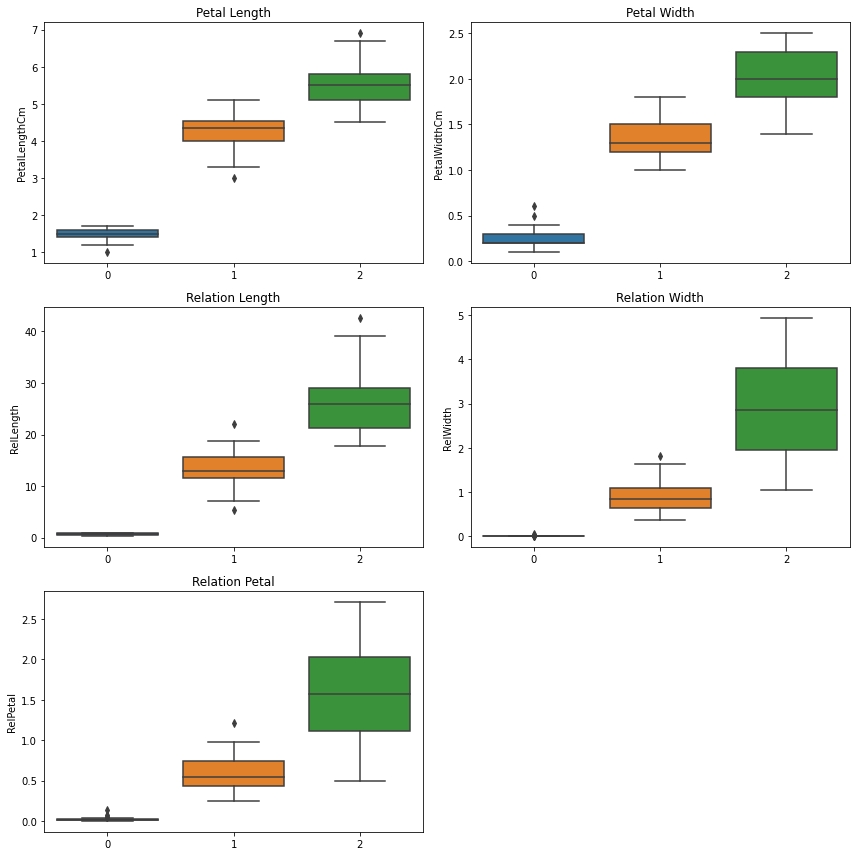

In [23]:
plt.figure(figsize=(12, 12))
plt.subplot(3,2,1)
plt.title("Petal Length")
sns.boxplot(y="PetalLengthCm", x=y_train, data=X_train,)
plt.subplot(3,2,2)
plt.title("Petal Width")
sns.boxplot(y="PetalWidthCm", x=y_train, data=X_train)
plt.subplot(3,2,3)
plt.title("Relation Length")
sns.boxplot(y="RelLength", x=y_train, data=X_train)
plt.subplot(3,2,4)
plt.title("Relation Width")
sns.boxplot(y="RelWidth", x=y_train, data=X_train)
plt.subplot(3,2,5)
plt.title("Relation Petal")
sns.boxplot(y="RelPetal", x=y_train, data=X_train)
plt.tight_layout()
plt.show()

In [24]:
# After added new a column, we need to prepare the data again.
X_train_new = X_train.copy()

full_pipeline_new = ColumnTransformer([
    ("num", num_pipeline, X_train_new.columns)
])

X_train_prepared_new = full_pipeline_new.fit_transform(X_train_new)
X_test_prepared_new = full_pipeline_new.transform(X_test)
print(X_train_prepared_new[0])

[-0.18341766 -0.54551376  0.17265991  0.11167252 -0.13507037 -0.36119307
 -0.25947479]


After feature engineering, let's check scores of the models.

In [25]:
print("Logistic Regression")
scores_log_fe = cross_val_score(log_reg, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_log_fe)
print("\nKNN")
scores_knn_fe = cross_val_score(knn_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_knn_fe)
print("\nSVM")
scores_svm_fe = cross_val_score(svm_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_svm_fe)
print("\nDecision Tree")
scores_tree_fe = cross_val_score(tree_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_tree_fe)
print("\nRandom Forest")
scores_forest_fe = cross_val_score(forest_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_forest_fe)

Logistic Regression
Scores: [1.         0.93333333 0.96666667 0.96666667]
Mean: 0.9666666666666667
Standard deviation: 0.02357022603955158

KNN
Scores: [1.         0.9        0.96666667 0.93333333]
Mean: 0.95
Standard deviation: 0.03726779962499649

SVM
Scores: [1.         0.9        0.96666667 0.93333333]
Mean: 0.95
Standard deviation: 0.03726779962499649

Decision Tree
Scores: [0.96666667 0.9        0.96666667 0.96666667]
Mean: 0.9500000000000001
Standard deviation: 0.02886751345948128

Random Forest
Scores: [1.         0.9        0.96666667 0.96666667]
Mean: 0.9583333333333334
Standard deviation: 0.036324157862838935


As we can see, performance of the models is higher. Let's check whether models are overfitting or underfitting.

<a id="8"></a>
## Learning Curve
Learning curves indicates on model performance of the training set and the validation set.
We can determine common feature in each case:
- **Good Fit Model**
  - Training accuracy and validation accuracy are close to each other. The validation accuracy is slightly below the training accuracy.
  - In the beginning, both curves gradually increases until the curves flatten out.
- **Underfit Model**
  - The training accuracy curve gradually decreases and suddenly rises at the end.
  - The validation accuracy curve suddenly rises at the end and is close to the curve of training accuracy at the end.
- **Overfit Model**
  - The training accuracy and the validation accuracy are far away from each other.
  - Initially, the training accuracy curve has a very high score, which gradually decreases slightly.
  - The validation accuracy curve gradually increases without flattening out.

In [26]:
from sklearn.model_selection import learning_curve

def learn_curve(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=4, scoring='accuracy')    
    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    
    # Print scores
    print('\n',"-" * 5, model, "-" * 5)
    print("Training Scores:")
    display_scores(train_scores_mean)    
    print("\nValidation Scores:")
    display_scores(val_scores_mean)

    # Plot learning curve    
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, val_scores_mean, label="Validation Score")
    plt.title(model)
    plt.xlabel("Training Sizes")
    plt.ylabel("Accuracy")
    plt.legend()


 ----- LogisticRegression() -----
Training Scores:
Scores: [1.         1.         1.         0.98188406 0.975     ]
Mean: 0.9913768115942029
Standard deviation: 0.010783232021877262

Validation Scores:
Scores: [0.825      0.94166667 0.95       0.95       0.96666667]
Mean: 0.9266666666666667
Standard deviation: 0.051478150704934965


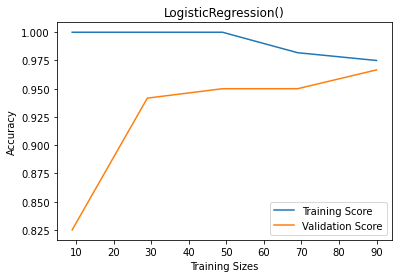

In [27]:
learn_curve(log_reg, X_train_prepared_new, y_train) # good fit


 ----- KNeighborsClassifier() -----
Training Scores:
Scores: [0.66666667 0.95689655 0.95408163 0.97101449 0.96388889]
Mean: 0.9025096465372755
Standard deviation: 0.1180676430769781

Validation Scores:
Scores: [0.44166667 0.91666667 0.925      0.93333333 0.95      ]
Mean: 0.8333333333333334
Standard deviation: 0.196143371598997


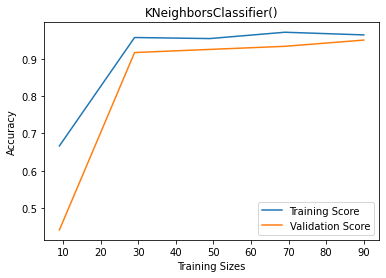

In [28]:
learn_curve(knn_clf, X_train_prepared_new, y_train) # good fit


 ----- SVC() -----
Training Scores:
Scores: [1.         1.         0.99489796 0.98913043 0.97222222]
Mean: 0.9912501232377009
Standard deviation: 0.010324548319428603

Validation Scores:
Scores: [0.85833333 0.95833333 0.95       0.95833333 0.95      ]
Mean: 0.9349999999999999
Standard deviation: 0.03851406669430451


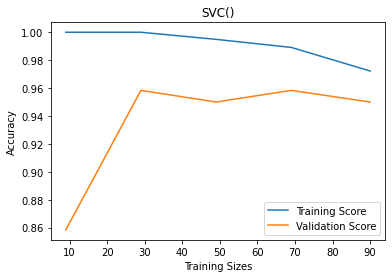

In [29]:
learn_curve(svm_clf, X_train_prepared_new, y_train) # good fit


 ----- DecisionTreeClassifier() -----
Training Scores:
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0

Validation Scores:
Scores: [0.85833333 0.94166667 0.95833333 0.95833333 0.95      ]
Mean: 0.9333333333333333
Standard deviation: 0.0380058475033046


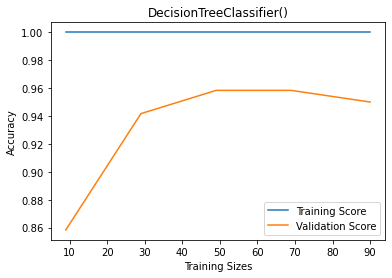

In [30]:
learn_curve(tree_clf, X_train_prepared_new, y_train) # overfit


 ----- RandomForestClassifier() -----
Training Scores:
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0

Validation Scores:
Scores: [0.85833333 0.95       0.95833333 0.96666667 0.96666667]
Mean: 0.9400000000000001
Standard deviation: 0.04129837231121287


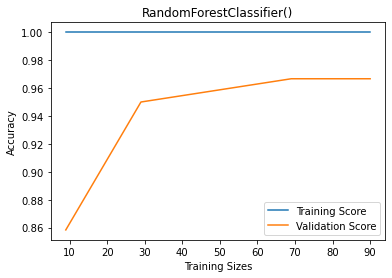

In [31]:
learn_curve(forest_clf, X_train_prepared_new, y_train) # overfit

The first three models (log_reg, knn_clf, svm_clf) indicate on a good fit models. However, we can make it better during hyperparameter tuning. In this case, we can decrease the bias.
Next two models (tree_clf, forest_clf) indicate overfitting. In order to improve performance, high variance should be reduced.

<a id="9"></a>
## Hyperparameter Tuning
We will use *GridSearchCV()* to search the best estimator parameters.
Another function RandomSearchCV() can make fastes search process.


 ----- LogisticRegression(C=0.75) -----
Training Scores:
Scores: [1.         1.         0.99489796 0.98188406 0.975     ]
Mean: 0.9903564034309376
Standard deviation: 0.010141236632234402

Validation Scores:
Scores: [0.81666667 0.94166667 0.95       0.95833333 0.96666667]
Mean: 0.9266666666666665
Standard deviation: 0.05562773089426211

 ----- LogisticRegression() -----
Training Scores:
Scores: [1.         1.         1.         0.98188406 0.975     ]
Mean: 0.9913768115942029
Standard deviation: 0.010783232021877262

Validation Scores:
Scores: [0.825      0.94166667 0.95       0.95       0.96666667]
Mean: 0.9266666666666667
Standard deviation: 0.051478150704934965


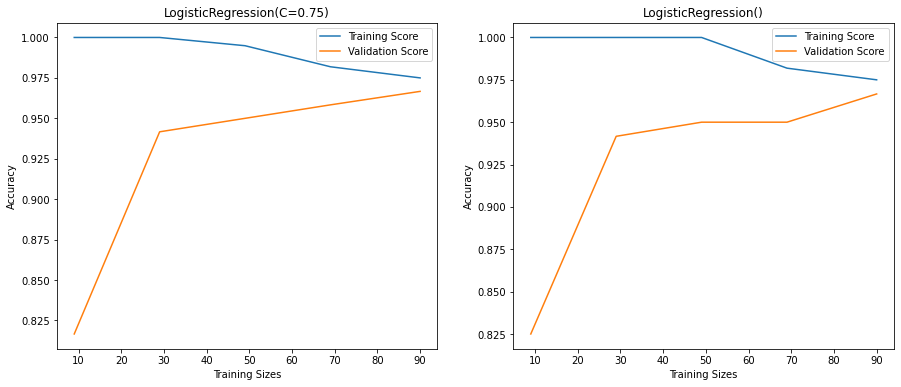

In [32]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_log = {
     'C': [0.1, 0.25 ,0.5 ,0.75, 1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 6, 7],
     'multi_class': ['auto', 'ovr', 'multinomial']
}

grid_log = GridSearchCV(log_reg, param_grid_log, cv=4, scoring='accuracy')
grid_log.fit(X_train_prepared_new, y_train)

log_reg_new = grid_log.best_estimator_

plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
learn_curve(log_reg_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(log_reg, X_train_prepared_new, y_train)


 ----- KNeighborsClassifier() -----
Training Scores:
Scores: [0.66666667 0.95689655 0.95408163 0.97101449 0.96388889]
Mean: 0.9025096465372755
Standard deviation: 0.1180676430769781

Validation Scores:
Scores: [0.44166667 0.91666667 0.925      0.93333333 0.95      ]
Mean: 0.8333333333333334
Standard deviation: 0.196143371598997

 ----- KNeighborsClassifier() -----
Training Scores:
Scores: [0.66666667 0.95689655 0.95408163 0.97101449 0.96388889]
Mean: 0.9025096465372755
Standard deviation: 0.1180676430769781

Validation Scores:
Scores: [0.44166667 0.91666667 0.925      0.93333333 0.95      ]
Mean: 0.8333333333333334
Standard deviation: 0.196143371598997


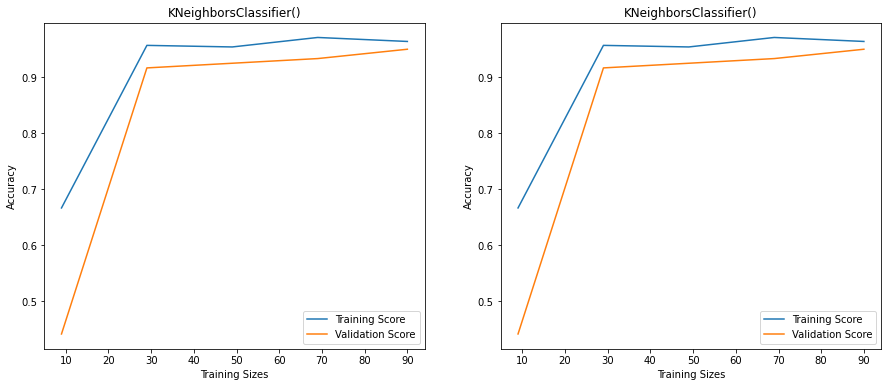

In [33]:
# KNN
param_grid_knn = {
    'n_neighbors': [5, 6, 7],
}

grid_knn = GridSearchCV(knn_clf, param_grid_knn, cv=4, scoring='accuracy')
grid_knn.fit(X_train_prepared_new, y_train)

knn_clf_new = grid_knn.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(knn_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(knn_clf, X_train_prepared_new, y_train)


 ----- SVC(C=1.2875) -----
Training Scores:
Scores: [1.         1.         0.99489796 0.98913043 0.975     ]
Mean: 0.9918056787932563
Standard deviation: 0.009310679548885242

Validation Scores:
Scores: [0.86666667 0.975      0.96666667 0.95833333 0.96666667]
Mean: 0.9466666666666667
Standard deviation: 0.04034572812303402

 ----- SVC() -----
Training Scores:
Scores: [1.         1.         0.99489796 0.98913043 0.97222222]
Mean: 0.9912501232377009
Standard deviation: 0.010324548319428603

Validation Scores:
Scores: [0.85833333 0.95833333 0.95       0.95833333 0.95      ]
Mean: 0.9349999999999999
Standard deviation: 0.03851406669430451


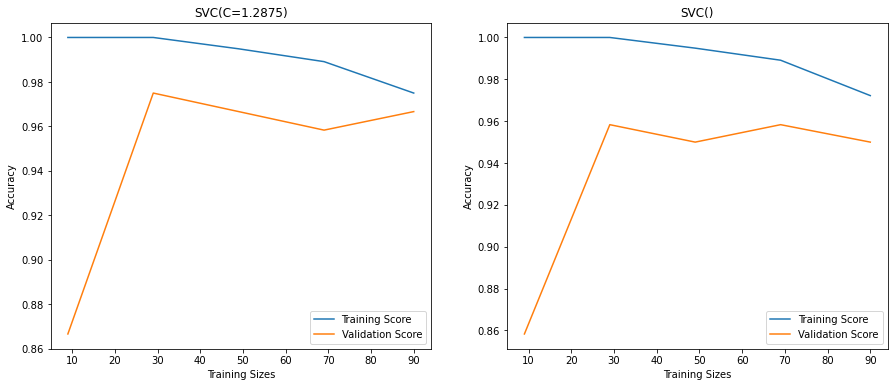

In [34]:
# SVC 
param_grid_svm = {
    'C': np.linspace(0.1, 2, 9),
    'gamma': ['scale', 'auto']    
}

grid_svm = GridSearchCV(svm_clf, param_grid_svm, cv=4, scoring='accuracy')
grid_svm.fit(X_train_prepared_new, y_train)

svm_clf_new = grid_svm.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(svm_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(svm_clf, X_train_prepared_new, y_train)


 ----- DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5) -----
Training Scores:
Scores: [0.66666667 0.99137931 0.96938776 0.97826087 0.96944444]
Mean: 0.9150278092246393
Standard deviation: 0.12444067074753515

Validation Scores:
Scores: [0.50833333 0.94166667 0.925      0.95833333 0.95      ]
Mean: 0.8566666666666667
Standard deviation: 0.174515201502779

 ----- DecisionTreeClassifier() -----
Training Scores:
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0

Validation Scores:
Scores: [0.71666667 0.95       0.96666667 0.95833333 0.96666667]
Mean: 0.9116666666666667
Standard deviation: 0.09769567259835228


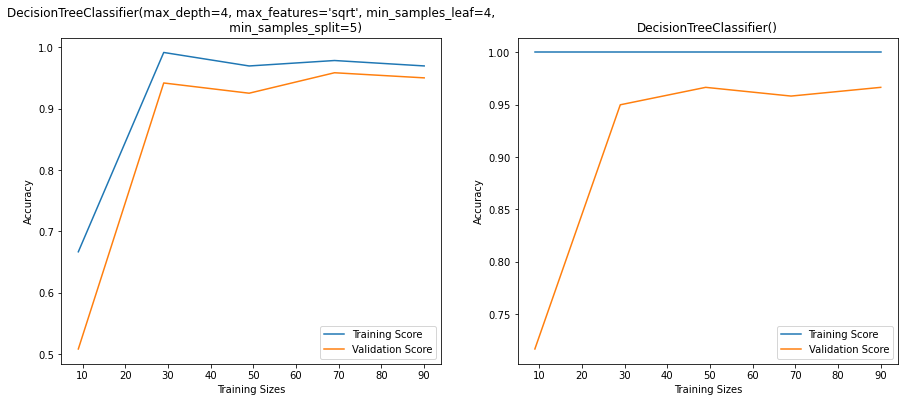

In [35]:
# Decision Tree
param_grid_tree = {
     'max_depth' : [4, 5, 6, 7, 8],
     'max_features': ['auto' ,'sqrt', 'log2'],
     'min_samples_leaf' : [4,5,6,7,8],
     'min_samples_split': [4, 5, 6, 7, 8]
}

grid_tree = GridSearchCV(tree_clf, param_grid_tree, cv=4, scoring='accuracy')
grid_tree.fit(X_train_prepared_new, y_train)

tree_clf_new = grid_tree.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(tree_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(tree_clf, X_train_prepared_new, y_train)


 ----- RandomForestClassifier(max_depth=4, min_samples_leaf=5, n_estimators=5) -----
Training Scores:
Scores: [0.55555556 0.98275862 0.9744898  0.98188406 0.97222222]
Mean: 0.893382050471363
Standard deviation: 0.16896257358110686

Validation Scores:
Scores: [0.35       0.96666667 0.95       0.95833333 0.96666667]
Mean: 0.8383333333333333
Standard deviation: 0.24424486802296497

 ----- RandomForestClassifier() -----
Training Scores:
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0

Validation Scores:
Scores: [0.85833333 0.94166667 0.95833333 0.96666667 0.95833333]
Mean: 0.9366666666666668
Standard deviation: 0.03999999999999999


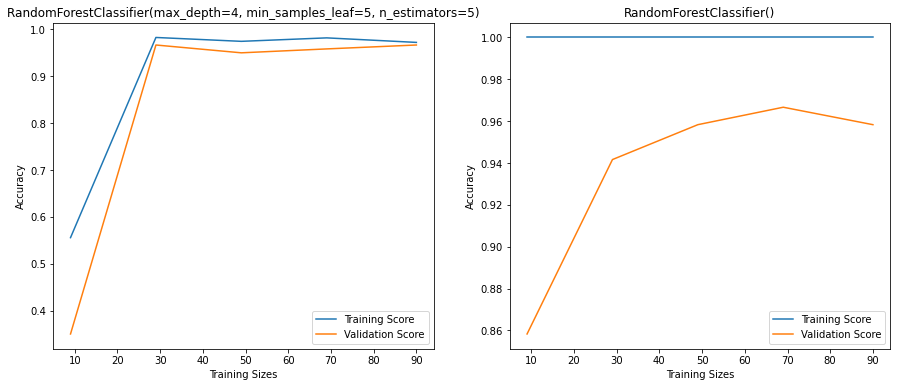

In [36]:
# Random Forest
param_grid_forest = {
     'n_estimators': [4, 5, 6],
     'max_features': ['auto' ,'sqrt', 'log2'],
     'min_samples_leaf' : [5, 6, 7, 8, 9],
     'max_depth' : [4, 5, 6]
}

grid_forest = GridSearchCV(forest_clf, param_grid_forest, cv=4, scoring='accuracy')
grid_forest.fit(X_train_prepared_new, y_train)

forest_clf_new = grid_forest.best_estimator_

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
learn_curve(forest_clf_new, X_train_prepared_new, y_train)
plt.subplot(1,2,2)
learn_curve(forest_clf, X_train_prepared_new, y_train)

Almost every model achieves a better validation score.
Finally, we test our models on real data.

<a id="10"></a>
## Test Models on Real Data
Let's create a simple function that prints out all test scores.

In [37]:
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': log_reg_new,
    'KNN': knn_clf_new,
    'SVC': svm_clf_new,
    'Decision Tree': tree_clf_new,
    'Random Forest': forest_clf_new
}

def test_scores(model, X_train, X_test, y_train, y_test):
    for name, variable in model.items():
        variable.fit(X_train, y_train)
        y_pred = variable.predict(X_test)
        print(f'The accuracy of the {name} is {accuracy_score(y_test, y_pred) * 100 :.2f} %.')
        
        
test_scores(models, X_train_prepared_new, X_test_prepared_new, y_train, y_test)

The accuracy of the Logistic Regression is 100.00 %.
The accuracy of the KNN is 100.00 %.
The accuracy of the SVC is 100.00 %.
The accuracy of the Decision Tree is 96.67 %.
The accuracy of the Random Forest is 96.67 %.


<a id="11"></a>
## Observations:
- The Petal features give a better cluster division compared to the Sepal features.
- The species *“Iris-setosa”* is easy to distinguish in *Petal Length* and *Petal Width* values.
- The species *“Iris-virginica”* and *“Iris-versicolor”* overlap in these values, making them a little harder to distinguish.